In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(yieldden)

In [3]:
yieldden

Yield,Dens,Var
105.6,3.07,1
89.4,3.31,1
71.0,5.97,1
60.3,6.99,1
47.6,8.67,1
37.7,13.39,1
30.3,17.86,1
24.2,21.57,1
20.8,28.77,1
18.5,31.08,1


In [4]:
yieldden$Var <- factor(yieldden$Var)

In [5]:
yieldden

Yield,Dens,Var
105.6,3.07,1
89.4,3.31,1
71.0,5.97,1
60.3,6.99,1
47.6,8.67,1
37.7,13.39,1
30.3,17.86,1
24.2,21.57,1
20.8,28.77,1
18.5,31.08,1


In [6]:
yieldden$YD <- with(yieldden, Yield * Dens )

In [7]:
yieldden

Yield,Dens,Var,YD
105.6,3.07,1,324.192
89.4,3.31,1,295.914
71.0,5.97,1,423.870
60.3,6.99,1,421.497
47.6,8.67,1,412.692
37.7,13.39,1,504.803
30.3,17.86,1,541.158
24.2,21.57,1,521.994
20.8,28.77,1,598.416
18.5,31.08,1,574.980


In [8]:
yd.glm.int <- glm( YD ~ (Dens + I(1/Dens)) * factor(Var),
family=Gamma(link=inverse), data=yieldden )

In [9]:
gof.dev <- deviance(yd.glm.int)
gof.pearson <- sum(yd.glm.int$weights * yd.glm.int$residuals^2)

phi.md <- gof.dev / df.residual(yd.glm.int)
phi.pearson <- gof.pearson / df.residual(yd.glm.int)

phi.md
phi.pearson

pchisq(gof.dev, df=df.residual(yd.glm.int), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(yd.glm.int), lower.tail = FALSE)



[1] 0.005242216

[1] 0.005236209

[1] 1

[1] 1

In [10]:
gof.dev/df.residual(yd.glm.int)
gof.pearson/df.residual(yd.glm.int)
summary(yd.glm.int)$dispersion

[1] 0.005242216

[1] 0.005236209

[1] 0.005236209

In [18]:
coef(summary(yd.glm.int))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.783208e-03,2.446892e-04,7.28764403,3.551639e-07
Dens,-7.358163e-06,8.672711e-06,-0.84842709,4.057676e-01
I(1/Dens),4.561689e-03,1.046401e-03,4.35940860,2.751046e-04
factor(Var)2,1.991961e-04,3.448443e-04,0.57764076,5.696491e-01
factor(Var)3,5.820274e-04,3.585704e-04,1.62318856,1.194663e-01
Dens:factor(Var)2,1.223482e-06,1.422932e-05,0.08598316,9.322943e-01
Dens:factor(Var)3,-1.147274e-05,1.320350e-05,-0.86891629,3.947156e-01
I(1/Dens):factor(Var)2,-9.722031e-04,1.311974e-03,-0.74102340,4.668853e-01
I(1/Dens):factor(Var)3,-1.462929e-03,1.441500e-03,-1.01486629,3.217204e-01


In [11]:
round( anova( yd.glm.int, test="F"), 2)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,29,1.45,NA,NA
Dens,1,1.00,28,0.45,191.67,0.00
I(1/Dens),1,0.27,27,0.18,51.28,0.00
factor(Var),2,0.06,25,0.12,5.48,0.01
Dens:factor(Var),2,0.01,23,0.12,0.57,0.57
I(1/Dens):factor(Var),2,0.01,21,0.11,0.53,0.59


In [12]:
yd.glm <- update( yd.glm.int, . ~ Dens + I(1/Dens) + factor(Var) )

In [13]:
gof.dev <- deviance(yd.glm)
gof.pearson <- sum(yd.glm$weights * yd.glm$residuals^2)

phi.md <- gof.dev / df.residual(yd.glm)
phi.pearson <- gof.pearson / df.residual(yd.glm)

phi.md
phi.pearson

pchisq(gof.dev, df=df.residual(yd.glm), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(yd.glm), lower.tail = FALSE)

gof.dev
gof.pearson

[1] 0.004866494

[1] 0.004789151

[1] 1

[1] 1

[1] 0.1216623

[1] 0.1197288

In [14]:
round( anova(yd.glm, test="F"), 2)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,29,1.45,NA,NA
Dens,1,1.00,28,0.45,209.56,0.00
I(1/Dens),1,0.27,27,0.18,56.07,0.00
factor(Var),2,0.06,25,0.12,5.99,0.01


In [15]:
coef(summary(yd.glm))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),1.968744e-03,1.393384e-04,14.129228,2.009258e-13
Dens,-1.260912e-05,5.163738e-06,-2.441859,2.202628e-02
I(1/Dens),3.574426e-03,4.936431e-04,7.240911,1.376387e-07
factor(Var)2,1.001489e-04,7.172689e-05,1.396253,1.749138e-01
factor(Var)3,2.450265e-04,7.118726e-05,3.441999,2.041352e-03



	Shapiro-Wilk normality test

data:  qr1
W = 0.94739, p-value = 0.1439


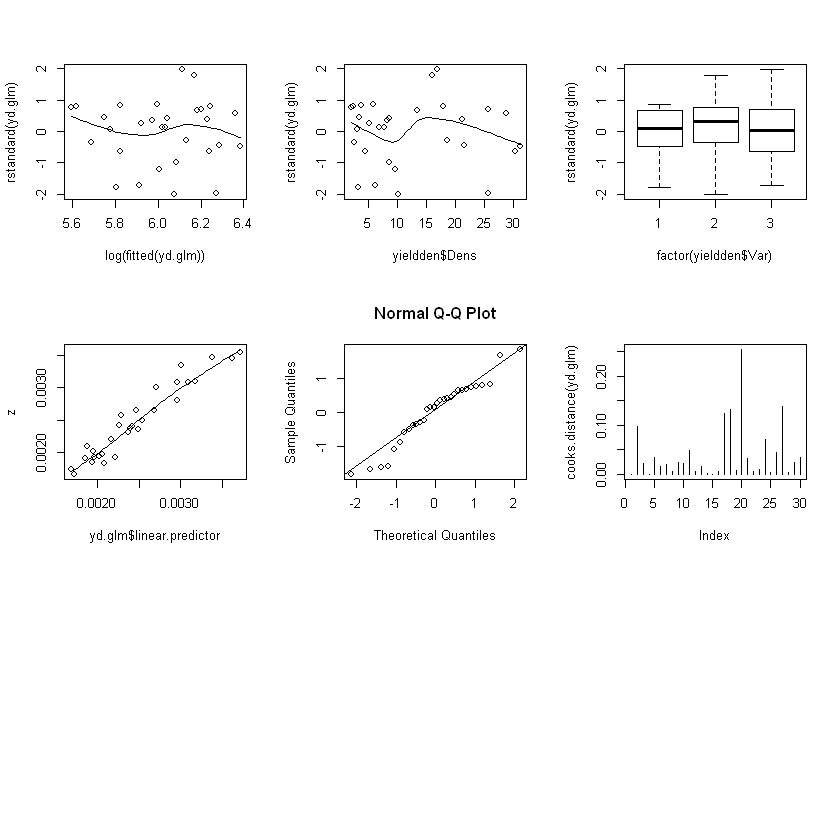

In [16]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(yd.glm) ~ log(fitted(yd.glm)))
scatter.smooth(rstandard(yd.glm) ~ yieldden$Dens)
plot(rstandard(yd.glm) ~ factor(yieldden$Var))
z <- resid(yd.glm, type="working") + yd.glm$linear.predictor
scatter.smooth(z ~ yd.glm$linear.predictor)
qqnorm(qr1 <- qresid(yd.glm))
qqline(qr1)
plot(cooks.distance(yd.glm), type="h")
shapiro.test(qr1)

In [17]:
colSums(influence.measures(yd.glm)$is.inf)

dfb.1_  dfb.Dens  dfb.I(1/ dfb.f(V)2 dfb.f(V)3     dffit     cov.r    cook.d 
        0         0         0         0         0         0         2         0 
      hat 
        0